In [3]:
import os
sep = os.sep
import numpy as np

In [4]:
file = ''

In [5]:
CONF = {
    'Dirs': {
        'image': 'data' + sep + 'DRIVE' + sep + 'images',
        'mask': 'data' + sep + 'DRIVE' + sep + 'mask',
        'truth': 'data' + sep + 'DRIVE' + sep + 'manual',
        'logs': 'LOGS_2019' + sep + 'DRIVE',
        'splits_json': 'data' + sep + 'DRIVE' + sep + 'splits'
    },

    'Funcs': {
        'truth_getter': lambda file_name: file_name.split('_')[0] + '_manual1.gif',
        'mask_getter': lambda file_name: file_name.split('_')[0] + '_mask.gif',
    }
}

In [6]:
from PIL import Image as IMG
from utils import img_utils as iu
from utils.img_utils import Image

In [7]:
file = '01_test'
image = Image()

In [8]:
image.load_file(CONF['Dirs']['image'], file+'.tif')
image.load_ground_truth(CONF['Dirs']['truth'], CONF['Funcs']['truth_getter'])
image.load_mask(CONF['Dirs']['mask'], CONF['Funcs']['mask_getter'])

In [9]:
file1 = 'pred_' + file + '.png'
image.u_1_1 = np.array(IMG.open(CONF['Dirs']['logs'] + sep + 'UNET_1_1' + sep + file1))
image.u_1_100 = np.array(IMG.open(CONF['Dirs']['logs'] + sep + 'UNET_1_100_1' + sep + file1))

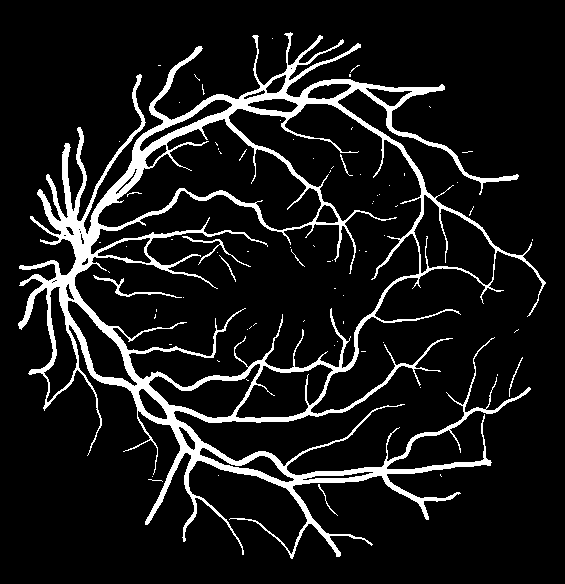

In [10]:
IMG.fromarray(image.u_1_100)

In [11]:
from sklearn.metrics import f1_score

In [12]:
image.u_1_1[image.u_1_1==255] = 1
image.u_1_100[image.u_1_100==255] = 1

In [69]:
f1_score(image.ground_truth, image.u_1_100, average='micro')

0.8325436707346255

In [70]:
from scipy.ndimage.morphology import distance_transform_edt

In [75]:
edt_orig = distance_transform_edt(image.u_1_100)
# edt_orig[edt_orig>=2] = 0
# edt = edt_orig/np.max(edt_orig) * 255

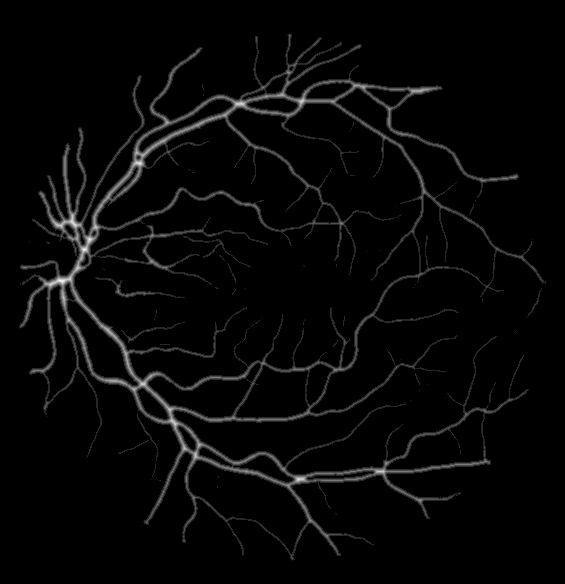

In [72]:
IMG.fromarray(np.array(edt, dtype=np.uint8))

In [76]:
image.ground_truth[image.ground_truth==255] = 1
f1_score(image.ground_truth.flatten(), image.u_1_100.flatten(), average='micro',\
         sample_weight=edt_orig.flatten())

0.8563469429593709

In [47]:
np.unique(image.ground_truth, return_counts=True)

(array([  0, 255], dtype=uint8), array([300520,  29440], dtype=int64))

In [24]:
edt_orig.flatten().shape

(329960,)

In [105]:
a = {
    'one':1,
    'two':2
}

In [106]:
b = {}

In [107]:
b['three'] = 3

In [108]:
a

{'one': 1, 'two': 2}

In [109]:
b

{'three': 3}

In [110]:
a['333'] = b['three']

In [111]:
a

{'one': 1, 'two': 2, '333': 3}

In [112]:
b

{'three': 3}

In [113]:
b['three'] = 33

In [114]:
a

{'one': 1, 'two': 2, '333': 3}

In [116]:
a

{'one': 1, 'two': 2, '333': 3}